# Market Basket Analysis with Association Rule

Suppose we can mathematically capture the significance of these associations, then it would be a good idea to try and exploit the rules which are likely to be correct. The whole concept of association rule-mining is based on the concept that customer purchase behavior has a pattern which can be exploited for selling more items to the customer in the future. An association rule usually has the structure as depicted in this equation:

$$\left \{ item_1,item_2,item_3 \rightarrow item_k \right \}$$

This rule can be read in the obvious manner that when the customer bought items on the (left hand side) LHS of the rule he is likely to buy the $item_k$ . In the later sections, we define mathematical metrics that will capture the strength of such rules.

We can use these rules in a variety of ways . The most obvious way to use these rules is to develop bundles of products which make it convenient for the customer to buy these items together. Another way to use these rules is to bundle products along with some discounts for other relevant products in the bundle, hence ensuring that the customer becomes more likely to buy more items. Some unlikely ways to use association rules is for designing a better web site navigational structure, intrusion detection, bioinformatics, and so on.

In [1]:
%%html
<style>table {margin-left: 15 !important;}</style>

## Association Rule-Mining Basics
Before proceeding to explore the association rules in our dataset, we will go through some essential concepts for association rule-mining. These terms and concepts will help you in the later analysis and also in understanding the rules that the algorithm will generate. Consider below with some toy transaction data.

| Trans.ID | Items                 |
|----------|-----------------------|
| 1        | {milk, bread}         |
| 2        | {butter}              |
| 3        | {beer, diaper}        |
| 4        | {milk, bread, butter} |
| 5        | {bread}               |



Each row in the table consists of a transaction. For example, the customer bought milk and bread in the first transaction. Following are some vital concepts pertaining to association rule-mining.

- Itemset: Itemset is just a collection of one or more items that occur together in a transaction. For example, here {milk, bread} is example of an itemset.


- Support: Support is defined as number of times an itemset appears in the dataset. Mathematically it is defined as:
    
    $$ \mathit{\operatorname{supp}}\left(\left\{ beer, diaper\right\}\right)=\frac{\mathrm{number}\kern0.17em \mathrm{of}\kern0.17em \mathrm{transactions}\kern0.17em \mathrm{with}\kern0.17em \mathrm{beer}\kern0.17em \mathrm{and}\kern0.17em \mathrm{diaper}}{total\kern0.17em transactions} $$
  In the previous example, support (beer, diaper) = 1/5 = 0.2.
  
  
- Confidence: Confidence is a measure of the times the number of times a rule is found to exist in the dataset. For a rule which states $ \left\{ beer\to diaper\right\} $ the confidence is mathematically defined as:
    
    $$ confidence\left(\left\{ beer, diaper\right\}\right)=\frac{\mathit{\operatorname{supp}}\left( beer\kern0.17em and\kern0.17em diaper\right)}{\mathit{\operatorname{supp}}(beer)} $$
    
    
- Lift: Lift of the rule is defined as the ratio of observed support to the support expected in the case the elements of the rule were independent. For the previous set of transactions if the rule is defined as $ \left\{X\to \mathrm{Y}\right\} $, then the lift of the rule is defined as:
    $$ lift\left(X\to Y\right)=\frac{\mathit{\operatorname{supp}}\left(X\cup Y\right)}{\left(\mathit{\operatorname{supp}}(X)\ast \mathit{\operatorname{supp}}(X)\right)} $$


- Frequent itemset: Frequent itemsets are itemsets whose support is greater than a user defined support threshold.



## FP Growth
The most famous algorithm for association rule-mining is the Apriori algorithm, for which you will find a lot of code and resources on the web and in standard data mining literature. However, here we will use a different and more efficient algorithm, the FP growth algorithm for finding our association rules. The major bottleneck in any association rule-mining algorithm is the generation of frequent itemsets. If the transaction dataset is having k unique products, then potentially we have $ {2}^k $ possible itemsets. The Apriori algorithm will first generate these itemsets and then proceed to finding the frequent itemsets.

This limitation is a huge performance bottleneck as even for around 100 unique products the possible number of itemsets is huge. This limitation makes the Apriori algorithm prohibitively computationally expensive. The FP growth algorithm is superior to Apriori algorithm as it doesn’t need to generate all the candidate itemsets. The algorithm uses a special data structure that helps it retains itemset association information. An example of the data structure is depicted in below figure.

<img src='../images/fp-tree.jpg' >

We will not go into detailed mathematical descriptions of the algorithm here, as the intent is to not to keep this section math heavy but to focus on how it can be leveraged to find patterns in this data. However, we will explain it in brief so you can understand the core concepts in this method. The FP growth algorithm uses a divide-and-conquer strategy and leverages a special data structure called the FP-tree, as depicted in above figure, to find frequent itemsets without generating all itemsets. The core steps of the algorithm are as follows:

1. Take in the transactional database and create an FP-tree structure to represent frequent itemsets.

2. Divide this compressed representation into multiple conditional datasets such that each one is associated with a frequent pattern.

3. Mine for patterns in each such dataset so that shorter patterns can be recursively concatenated to longer patterns, hence making it more efficient.
     

If you are interested in finding about it, you can refer to the Wikibooks [link](https://en.wikibooks.org/wiki/Data_Mining_Algorithms_In_R/Frequent_Pattern_Mining/The_FP-Growth_Algorithm) , which talks about FP growth and the FP tree structure in detail.

## Association Rule-Mining in Action
We will illustrate association rule-mining using the famous grocery dataset. The dataset is available by default in the R language’s base package. To use in in Python, you can obtain it from [Github](https://github.com/stedy/Machine-Learning-with-R-datasets/blob/master/groceries.csv). This dataset consists of a collection of transactions that are sourced from a grocery retailer. We will use this data as the basis of our analysis and build our rule-mining work flow using this data.

Once we have grasped the basics of association rule-mining on the grocery dataset, we will leave it as an exercise for you to apply the same concepts on our transaction dataset that we used in the customer segmentation section. Remember to load the following dependencies before getting started.

*conda install orange3*

### Load Necessary Dependencies

In [3]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
import Orange
import numpy as np

from Orange.data import Domain, DiscreteVariable, ContinuousVariable

%matplotlib inline

### Construct and Load the Groceries Dataset

In [ ]:
#%pycat ..\\data\\groceries.csv #taking some time to appear

In [4]:
grocery_items = set()

with open("../data/groceries.csv") as f:
    reader = csv.reader(f, delimiter=",")
    for i, line in enumerate(reader):
        grocery_items.update(line)
output_list = list()

with open("../data/groceries.csv") as f:
    reader = csv.reader(f, delimiter=",")
    for i, line in enumerate(reader):
        row_val = {item:0 for item in grocery_items}
        row_val.update({item:1 for item in line})
        output_list.append(row_val)
grocery_df = pd.DataFrame(output_list)

In [5]:
grocery_df.head()

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,baby food,bags,baking powder,bathroom cleaner,beef,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [5]:
grocery_df.shape

(9835, 169)

The conversion gives us a dataframe of dimension (num_transaction, total_items), where each transaction row has columns corresponding to its constituent items as 1. For example, for row 3 in Figure 8-11, we will have the column for whole milk as 1 and the rest of columns will be all 0. Although this data structure is sparse, meaning it has a lot of zeros, our framework that extracts association rules will take care of this sparseness.

Before we proceed to building association rules on our dataset , we will explore some salient features of our dataset. We already know that we have 9,835 total transactions and a total of 169 items in the dataset. But what are the top 10 items that occur in the dataset and how much of the total sales they account for. We can plot a simple histogram that will help us extract this information.

In [6]:
#View top sold items
total_item_count = sum(grocery_df.sum())
print('total item count: ', total_item_count)
item_summary_df = grocery_df.sum().sort_values(ascending = False).reset_index().head(n=20)
item_summary_df.rename(columns={item_summary_df.columns[0]:'item_name',item_summary_df.columns[1]:'item_count'}, inplace=True)
item_summary_df.head()

total item count:  43367


,item_name,item_count
0,whole milk,2513
1,other vegetables,1903
2,rolls/buns,1809
3,soda,1715
4,yogurt,1372


Text(0.5,1,'Item sales distribution')

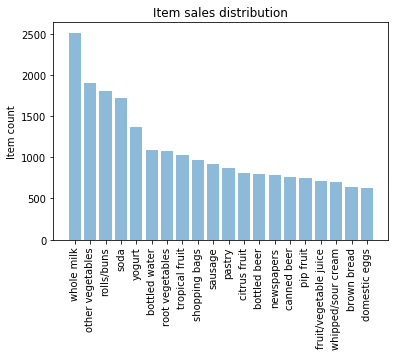

In [7]:
#Visualize top sold items
objects = (list(item_summary_df['item_name'].head(n=20)))
y_pos = np.arange(len(objects))
performance = list(item_summary_df['item_count'].head(n=20))
 
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects, rotation='vertical')
plt.ylabel('Item count')
plt.title('Item sales distribution')

In [7]:
#Analyze items contributing to top sales
item_summary_df['item_perc'] = item_summary_df['item_count']/total_item_count
item_summary_df['total_perc'] = item_summary_df.item_perc.cumsum()
item_summary_df.head(10)

,item_name,item_count,item_perc,total_perc
0,whole milk,2513,0.057947,0.057947
1,other vegetables,1903,0.043881,0.101829
2,rolls/buns,1809,0.041714,0.143542
3,soda,1715,0.039546,0.183089
4,yogurt,1372,0.031637,0.214725
5,bottled water,1087,0.025065,0.239791
6,root vegetables,1072,0.024719,0.264510
7,tropical fruit,1032,0.023797,0.288307
8,shopping bags,969,0.022344,0.310651
9,sausage,924,0.021307,0.331957


In [8]:
# Analyze items contributing to top 50% of sales
print(item_summary_df[item_summary_df.total_perc <= 0.5].shape)
item_summary_df[item_summary_df.total_perc <= 0.5]

(19, 4)


,item_name,item_count,item_perc,total_perc
0,whole milk,2513,0.057947,0.057947
1,other vegetables,1903,0.043881,0.101829
2,rolls/buns,1809,0.041714,0.143542
3,soda,1715,0.039546,0.183089
4,yogurt,1372,0.031637,0.214725
5,bottled water,1087,0.025065,0.239791
6,root vegetables,1072,0.024719,0.264510
7,tropical fruit,1032,0.023797,0.288307
8,shopping bags,969,0.022344,0.310651
9,sausage,924,0.021307,0.331957


In [9]:
#construct orange table
input_assoc_rules = grocery_df
domain_grocery = Domain([DiscreteVariable.make(name=item,values=['0', '1']) for item in input_assoc_rules.columns])
data_gro_1 = Orange.data.Table.from_numpy(domain=domain_grocery,  X=input_assoc_rules.as_matrix(),Y= None)

In [10]:
#Prune Dataset for frequently purchased items

def prune_dataset(input_df, length_trans = 2, total_sales_perc = 0.5, start_item = None, end_item = None):
    if 'total_items' in input_df.columns:
        del(input_df['total_items'])
        
    item_count = input_df.sum().sort_values(ascending = False).reset_index()
    total_items = sum(input_df.sum().sort_values(ascending = False))
    item_count.rename(columns={item_count.columns[0]:'item_name',item_count.columns[1]:'item_count'}, inplace=True)
    
    if not start_item and not end_item: 
        item_count['item_perc'] = item_count['item_count']/total_items
        item_count['total_perc'] = item_count.item_perc.cumsum()
        selected_items = list(item_count[item_count.total_perc < total_sales_perc].item_name)
        input_df['total_items'] = input_df[selected_items].sum(axis = 1)
        input_df = input_df[input_df.total_items >= length_trans]
        del(input_df['total_items'])
        return input_df[selected_items], item_count[item_count.total_perc < total_sales_perc]
    
    elif end_item > start_item:
        selected_items = list(item_count[start_item:end_item].item_name)
        input_df['total_items'] = input_df[selected_items].sum(axis = 1)
        input_df = input_df[input_df.total_items >= length_trans]
        del(input_df['total_items'])
        return input_df[selected_items],item_count[start_item:end_item]


In [12]:
output_df, item_counts = prune_dataset(input_df=grocery_df, length_trans=2,total_sales_perc=0.4)
print(output_df.shape)
print("=======================")
print(list(output_df.columns))

(4585, 13)
['whole milk', 'other vegetables', 'rolls/buns', 'soda', 'yogurt', 'bottled water', 'root vegetables', 'tropical fruit', 'shopping bags', 'sausage', 'pastry', 'citrus fruit', 'bottled beer']


In [13]:
from ubaru import *

In [14]:
#Association Rule Mining with FP Growth
input_assoc_rules = output_df
domain_grocery = Domain([DiscreteVariable.make(name=item,values=['0', '1']) for item in input_assoc_rules.columns])
data_gro_1 = Orange.data.Table.from_numpy(domain=domain_grocery,  X=input_assoc_rules.as_matrix(),Y= None)
data_gro_1_en, mapping = OneHot.encode(data_gro_1, include_class=False)

In [15]:
min_support = 0.01
print("num of required transactions = ", int(input_assoc_rules.shape[0]*min_support))
num_trans = input_assoc_rules.shape[0]*min_support
itemsets = dict(frequent_itemsets(data_gro_1_en, min_support=min_support))

num of required transactions =  45


In [16]:
len(itemsets)

166886

In [17]:
confidence = 0.3
rules_df = pd.DataFrame()

if len(itemsets) < 1000000: 
    rules = [(P, Q, supp, conf)
    for P, Q, supp, conf in association_rules(itemsets, confidence)
       if len(Q) == 1 ]

    names = {item: '{}={}'.format(var.name, val)
        for item, var, val in OneHot.decode(mapping, data_gro_1, mapping)}
    
    eligible_ante = [v for k,v in names.items() if v.endswith("1")]
    
    N = input_assoc_rules.shape[0]
    
    rule_stats = list(rules_stats(rules, itemsets, N))
    
    rule_list_df = []
    for ex_rule_frm_rule_stat in rule_stats:
        ante = ex_rule_frm_rule_stat[0]            
        cons = ex_rule_frm_rule_stat[1]
        named_cons = names[next(iter(cons))]
        if named_cons in eligible_ante:
            rule_lhs = [names[i][:-2] for i in ante if names[i] in eligible_ante]
            ante_rule = ', '.join(rule_lhs)
            if ante_rule and len(rule_lhs)>1 :
                rule_dict = {'support' : ex_rule_frm_rule_stat[2],
                             'confidence' : ex_rule_frm_rule_stat[3],
                             'coverage' : ex_rule_frm_rule_stat[4],
                             'strength' : ex_rule_frm_rule_stat[5],
                             'lift' : ex_rule_frm_rule_stat[6],
                             'leverage' : ex_rule_frm_rule_stat[7],
                             'antecedent': ante_rule,
                             'consequent':named_cons[:-2] }
                rule_list_df.append(rule_dict)
    rules_df = pd.DataFrame(rule_list_df)
    print("Raw rules data frame of {} rules generated".format(rules_df.shape[0]))
    if not rules_df.empty:
        pruned_rules_df = rules_df.groupby(['antecedent','consequent']).max().reset_index()
    else:
        print("Unable to generate any rule")

Raw rules data frame of 16628 rules generated


In [18]:
#Sorting rules in our Grocery Dataset
(pruned_rules_df[['antecedent','consequent',
                  'support','confidence','lift']].groupby('consequent')
                                                 .max()
                                                 .reset_index()
                                                 .sort_values(['lift', 'support','confidence'],
                                                              ascending=False))

,consequent,antecedent,support,confidence,lift
4,root vegetables,"yogurt, whole milk, tropical fruit",228,0.463636,2.230611
5,sausage,"shopping bags, rolls/buns",59,0.393162,2.201037
8,tropical fruit,"yogurt, root vegetables, whole milk",92,0.429907,2.156588
1,citrus fruit,"whole milk, other vegetables, tropical fruit",66,0.333333,2.125637
10,yogurt,"whole milk, tropical fruit",199,0.484211,1.891061
2,other vegetables,"yogurt, whole milk, tropical fruit",228,0.643836,1.826724
6,shopping bags,"soda, sausage",50,0.304878,1.782992
0,bottled water,"yogurt, soda",59,0.333333,1.707635
9,whole milk,"yogurt, tropical fruit",228,0.754098,1.703222
3,rolls/buns,"yogurt, whole milk, tropical fruit",97,0.522222,1.679095


### Association rule mining on our Online Retail dataset

In [19]:
#Load and Filter Dataset
cs_mba = pd.read_excel('../data/Online Retail.xlsx')
cs_mba_uk = cs_mba[cs_mba.Country == 'United Kingdom']

In [20]:
cs_mba_uk.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [21]:
#Remove returned item as we are only interested in the buying patterns
cs_mba_uk = cs_mba_uk[~(cs_mba_uk.InvoiceNo.str.contains("C") == True)]
cs_mba_uk = cs_mba_uk[~cs_mba_uk.Quantity<0]

In [22]:
cs_mba_uk.shape

(486286, 8)

In [23]:
cs_mba_uk.InvoiceNo.value_counts().shape

(18786,)

In [24]:
#Build Transaction Dataset
items = list(cs_mba_uk.Description.unique())
grouped = cs_mba_uk.groupby('InvoiceNo')
transaction_level_df_uk = grouped.aggregate(lambda x: tuple(x)).reset_index()[['InvoiceNo','Description']]

In [25]:
transaction_dict = {item:0 for item in items}
output_dict = dict()
temp = dict()
for rec in transaction_level_df_uk.to_dict('records'):
    invoice_num = rec['InvoiceNo']
    items_list = rec['Description']
    transaction_dict = {item:0 for item in items}
    transaction_dict.update({item:1 for item in items if item in items_list})
    temp.update({invoice_num:transaction_dict})

new = [v for k,v in temp.items()]
transaction_df = pd.DataFrame(new)
del(transaction_df[transaction_df.columns[0]])

In [26]:
transaction_df.shape

(18786, 4058)

In [27]:
transaction_df.head()

,3 TIER CAKE TIN GREEN AND CREAM,3 TIER CAKE TIN RED AND CREAM,5 HOOK HANGER MAGIC TOADSTOOL,60 TEATIME FAIRY CAKE CASES,"AIRLINE LOUNGE,METAL SIGN",ALARM CLOCK BAKELIKE GREEN,ALARM CLOCK BAKELIKE IVORY,ALARM CLOCK BAKELIKE ORANGE,ALARM CLOCK BAKELIKE RED,ANTIQUE GLASS DRESSING TABLE POT,...,SET OF 6 RIBBONS COUNTRY STYLE,SNACK TRAY RED VINTAGE DOILY,SET OF 6 RIBBONS PERFECTLY PRETTY,SET OF 6 RIBBONS PARTY,SET 10 CARDS SNOWY ROBIN 17099,SET 10 CARDS SWIRLY XMAS TREE 17104,"LETTER ""U"" BLING KEY RING",CREAM HANGING HEART T-LIGHT HOLDER,BLACK SIL'T SQU CANDLE PLATE,"PAPER CRAFT , LITTLE BIRDIE"
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
output_df_uk_n, item_counts_n = prune_dataset(input_df=transaction_df, length_trans=2, start_item=0, end_item=15)
output_df_uk_n.shape

(4961, 15)

In [29]:
output_df_uk_n.head()

,WHITE HANGING HEART T-LIGHT HOLDER,JUMBO BAG RED RETROSPOT,REGENCY CAKESTAND 3 TIER,PARTY BUNTING,LUNCH BAG RED RETROSPOT,ASSORTED COLOUR BIRD ORNAMENT,SET OF 3 CAKE TINS PANTRY DESIGN,NATURAL SLATE HEART CHALKBOARD,LUNCH BAG BLACK SKULL.,HEART OF WICKER SMALL,JUMBO BAG PINK POLKADOT,JUMBO SHOPPER VINTAGE RED PAISLEY,JUMBO STORAGE BAG SUKI,PACK OF 72 RETROSPOT CAKE CASES,PAPER CHAIN KIT 50'S CHRISTMAS
12,0,0,0,0,1,0,0,0,0,0,1,0,1,1,0
14,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
16,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
21,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
25,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0


In [30]:
# Association Rule Mining with FP Growth
input_assoc_rules = output_df_uk_n
domain_transac = Domain([DiscreteVariable.make(name=item,values=['0', '1']) for item in input_assoc_rules.columns])
data_tran_uk = Orange.data.Table.from_numpy(domain=domain_transac,  X=input_assoc_rules.as_matrix(),Y= None)
data_tran_uk_en, mapping = OneHot.encode(data_tran_uk, include_class=True)

In [31]:
support = 0.01
print("num of required transactions = ", int(input_assoc_rules.shape[0]*support))
num_trans = input_assoc_rules.shape[0]*support
itemsets = dict(frequent_itemsets(data_tran_uk_en, support))

num of required transactions =  49


In [32]:
len(itemsets)

645632

In [33]:
confidence = 0.3
rules_df = pd.DataFrame()
if len(itemsets) < 1000000: 
    rules = [(P, Q, supp, conf)
    for P, Q, supp, conf in association_rules(itemsets, confidence)
       if len(Q) == 1 ]

    names = {item: '{}={}'.format(var.name, val)
        for item, var, val in OneHot.decode(mapping, data_tran_uk, mapping)}
    
    eligible_ante = [v for k,v in names.items() if v.endswith("1")]
    
    N = input_assoc_rules.shape[0]
    
    rule_stats = list(rules_stats(rules, itemsets, N))
    
    rule_list_df = []
    for ex_rule_frm_rule_stat in rule_stats:
        ante = ex_rule_frm_rule_stat[0]            
        cons = ex_rule_frm_rule_stat[1]
        named_cons = names[next(iter(cons))]
        if named_cons in eligible_ante:
            rule_lhs = [names[i][:-2] for i in ante if names[i] in eligible_ante]
            ante_rule = ', '.join(rule_lhs)
            if ante_rule and len(rule_lhs)>1 :
                rule_dict = {'support' : ex_rule_frm_rule_stat[2],
                             'confidence' : ex_rule_frm_rule_stat[3],
                             'coverage' : ex_rule_frm_rule_stat[4],
                             'strength' : ex_rule_frm_rule_stat[5],
                             'lift' : ex_rule_frm_rule_stat[6],
                             'leverage' : ex_rule_frm_rule_stat[7],
                             'antecedent': ante_rule,
                             'consequent':named_cons[:-2] }
                rule_list_df.append(rule_dict)
    rules_df = pd.DataFrame(rule_list_df)
    print("Raw rules data frame of {} rules generated".format(rules_df.shape[0]))
    if not rules_df.empty:
        pruned_rules_df = rules_df.groupby(['antecedent','consequent']).max().reset_index()
    else:
        print("Unable to generate any rule")

Raw rules data frame of 117464 rules generated


In [34]:
#Sort and display rules
dw = pd.options.display.max_colwidth
pd.options.display.max_colwidth = 100
(pruned_rules_df[['antecedent','consequent',
                  'support','confidence','lift']].groupby('consequent')
                                                 .max()
                                                 .reset_index()
                                                 .sort_values(['lift', 'support','confidence'],
                                                              ascending=False)).head(5)

,consequent,antecedent,support,confidence,lift
8,PACK OF 72 RETROSPOT CAKE CASES,"WHITE HANGING HEART T-LIGHT HOLDER, REGENCY CAKESTAND 3 TIER, NATURAL SLATE HEART CHALKBOARD",145,0.971014,5.394404
9,PAPER CHAIN KIT 50'S CHRISTMAS,"WHITE HANGING HEART T-LIGHT HOLDER, REGENCY CAKESTAND 3 TIER, NATURAL SLATE HEART CHALKBOARD",94,0.597701,4.341428
3,JUMBO SHOPPER VINTAGE RED PAISLEY,"WHITE HANGING HEART T-LIGHT HOLDER, PAPER CHAIN KIT 50'S CHRISTMAS",384,0.879310,4.218819
5,LUNCH BAG BLACK SKULL.,"WHITE HANGING HEART T-LIGHT HOLDER, PACK OF 72 RETROSPOT CAKE CASES, LUNCH BAG RED RETROSPOT",227,0.852459,4.078157
4,JUMBO STORAGE BAG SUKI,"WHITE HANGING HEART T-LIGHT HOLDER, SET OF 3 CAKE TINS PANTRY DESIGN , JUMBO BAG PINK POLKADOT",405,0.852459,4.016191
